# Hyperparameter Tuning

In [1]:
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Create sample data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1)
#print(X,y)

In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Apply Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Apply Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Apply Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
# l1_ratio controls the mix of L1 and L2 penalties
elastic_net.fit(X_train, y_train)

ElasticNet()

In [4]:
# Evaluate the model
print("Lasso Score:", lasso_reg.score(X_test, y_test))
print("Ridge Score:", ridge_reg.score(X_test, y_test))
print("Elastic Net Score:", elastic_net.score(X_test, y_test))


Lasso Score: 0.9999927090744123
Ridge Score: 0.9997966921361443
Elastic Net Score: 0.8585685360582849


# Hyperparameter

In [5]:
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create sample data
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# model
rf = RandomForestClassifier()

# Define the parameter distribution
param = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40]
}

#Grid Search
grid_search = GridSearchCV(rf, param, cv=5)
grid_search.fit(X, y)

# Random Search
random_search = RandomizedSearchCV(rf, param_distributions=param, n_iter=10, cv=5, random_state=42)
random_search.fit(X, y)

print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Parameters (Random Search):", random_search.best_params_)

Best Parameters (Grid Search): {'max_depth': 10, 'n_estimators': 50}
Best Parameters (Random Search): {'n_estimators': 50, 'max_depth': None}


# Cross-validation

In [6]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

#data
iris = load_iris()
X, y = iris.data, iris.target

#model
svc = SVC(kernel='linear')

In [7]:
# K-Fold Cross-Validation
scores = cross_val_score(svc, X, y, cv=5)
#Stratified K-Fold Cross-Validation
stratified_kf = StratifiedKFold(n_splits=5)
stratified_scores = cross_val_score(svc, X, y, cv=stratified_kf)

#scores
print("K-Fold:", scores)
print("Average Score", scores.mean())
print("Stratified K-Fold", stratified_scores)
print("Average Score", stratified_scores.mean())

K-Fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average Score 0.9800000000000001
Stratified K-Fold [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average Score 0.9800000000000001


# Sampling

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)


def plot_class_distribution(y, title, ax):
    classes, counts = np.unique(y, return_counts=True)
    ax.bar(classes, counts)
    ax.set_title(title)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    for i in range(len(classes)):
        ax.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#stratify=y: Specifies that the split should be stratified based on the target variable y.

rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)

ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X, y)

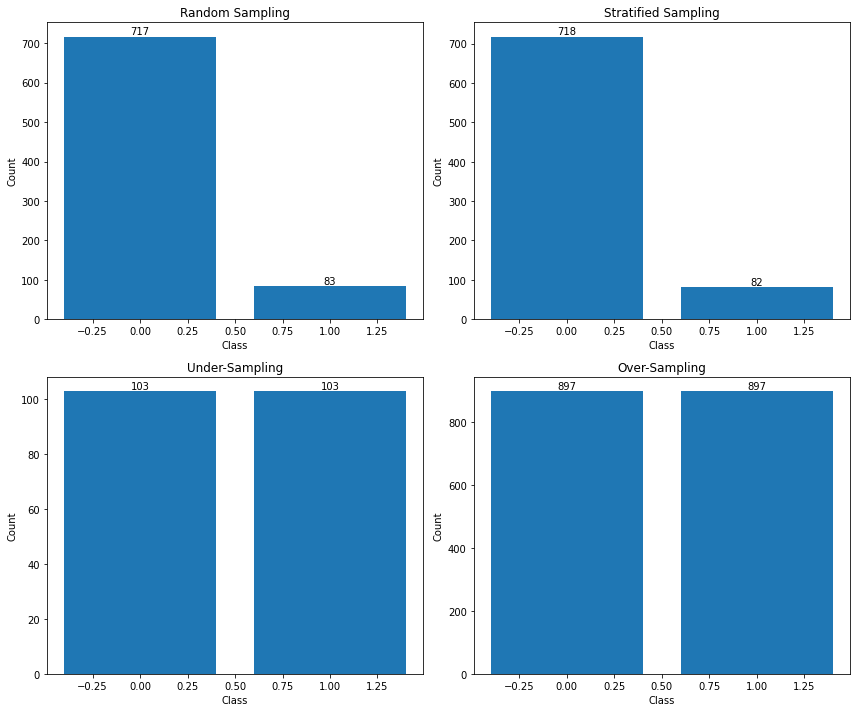

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_class_distribution(y_train, 'Random Sampling', axes[0, 0])
plot_class_distribution(y_train_strat, 'Stratified Sampling', axes[0, 1])
plot_class_distribution(y_resampled_under, 'Under-Sampling', axes[1, 0])
plot_class_distribution(y_resampled_over, 'Over-Sampling', axes[1, 1])

plt.tight_layout()
plt.show()
